In [2]:
from libpyhat.io.io_crism import Crism
from libpyhat.io.hcube import HCube
from libpyhat.derived.crism import crism_algs
import libpyhat as phat
from libpyhat.examples import get_path
from libpyhat.analytics.analytics import *

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
# shows available functions
# NOTE: functions beginning with "bp_" return three results to be mapped to rgb channels
available = [i for i in dir(crism_algs) if not i.startswith('__')]
print(available)

['bd1300', 'bd1400', 'bd1435', 'bd1500', 'bd1750', 'bd1900', 'bd1900_2', 'bd1900r', 'bd1900r2', 'bd2100', 'bd2165', 'bd2190', 'bd2210', 'bd2230', 'bd2250', 'bd2265', 'bd2290', 'bd2355', 'bd2500h', 'bd2600', 'bd3000', 'bd3100', 'bd3200', 'bd3400', 'bd530', 'bd640', 'bd860', 'bd920', 'bdcarb', 'bdi1000IR', 'bdi1000VIS', 'bdi2000', 'bp_CAR', 'bp_CHL', 'bp_CR2', 'bp_FAL', 'bp_FEM', 'bp_FM2', 'bp_HYD', 'bp_HYS', 'bp_IC2', 'bp_ICE', 'bp_IRA', 'bp_MAF', 'bp_PAL', 'bp_PFM', 'bp_PHY', 'bp_TAN', 'bp_TRU', 'bp_VNA', 'cf', 'cindex', 'cindex2', 'd2200', 'd2300', 'doub2200h', 'generic_func', 'hcp_index', 'hcp_index2', 'icer1', 'icer1_2', 'icer2', 'irr1', 'irr2', 'irr3', 'islope1', 'lcp_index', 'lcp_index2', 'min2200', 'min2250', 'min2295_2480', 'min2345_2537', 'np', 'olivine_index2', 'olivine_index3', 'r1080', 'r1300', 'r1330', 'r1506', 'r2529', 'r3920', 'r440', 'r530', 'r600', 'r770', 'rbr', 'rpeak1', 'sh600', 'sh770', 'sindex', 'sindex2']


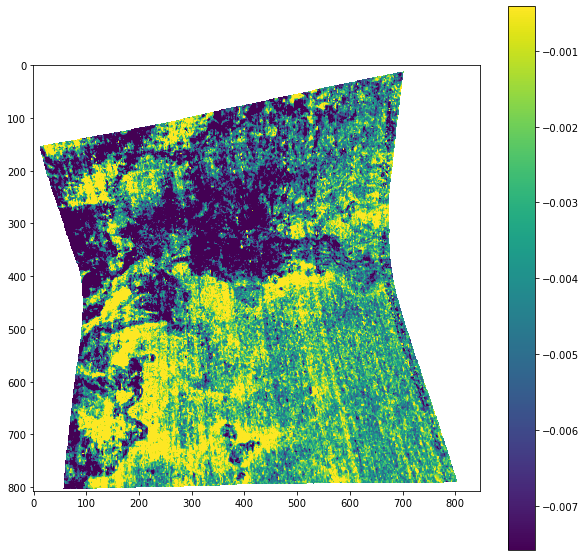

In [15]:
# show one parameter
file = "/home/tgiroux/Desktop/crism_img/frt000047a3_07_if166j_mtr3.img"
data = Crism(file)

color_mapping = 'cividis'
stretch_factor = 1

result = crism_algs.bd2100(data) # change this function to see different parameter

result_mean = np.nanmean(result)
result_std = np.nanstd(result)

figure(1, figsize=(10, 10))
imshow(result, vmin=(result_mean - (stretch_factor*result_std)), vmax=(result_mean+(stretch_factor*result_std)))
colorbar()
show()

In [4]:
# defines a function used in next cell
def band_scale(band,n_std):
    bmean = np.nanmean(band)
    bstd = np.nanstd(band)
    bmin = bmean - bstd * n_std
    bmax = bmean + bstd * n_std
    # normalize each band to span the range 0 to 1
    band[band < bmin] = bmin
    band[band > bmax] = bmax
    band = (band - bmin) / (bmax - bmin)
    return band

<ipython-input-4-f9e13b28ba2b>:8: RuntimeWarning: invalid value encountered in less
  band[band < bmin] = bmin
<ipython-input-4-f9e13b28ba2b>:9: RuntimeWarning: invalid value encountered in greater
  band[band > bmax] = bmax


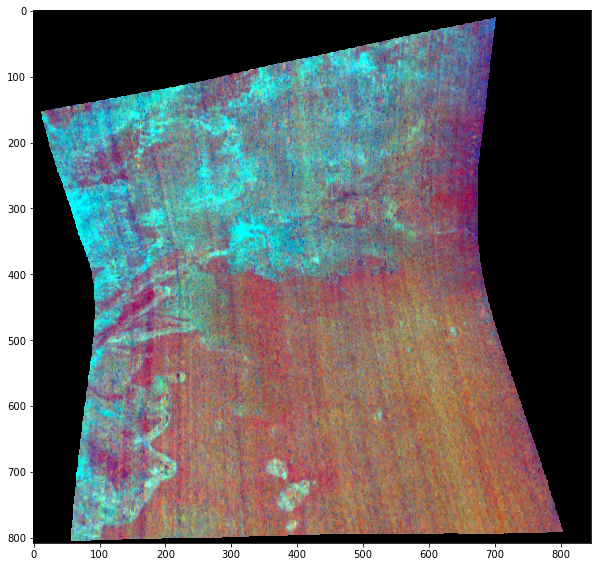

In [16]:
# show an RGB composite
file = "/home/tgiroux/Desktop/crism_img/frt000047a3_07_if166j_mtr3.img"
data = Crism(file)

stretch_rgb = {'r':3, 'g':3, 'b':3} # change these values to stretch

r,g,b = crism_algs.bp_PFM(data) # change this function to see a different browse product


r = band_scale(r, stretch_rgb['r'])
g = band_scale(g, stretch_rgb['g'])
b = band_scale(b, stretch_rgb['b'])

color_image = np.vstack(([r.T],[g.T],[b.T])).T

figure(1, figsize=(10, 10))
imshow(color_image)
show()